<H1>Introduction </H1>
As the first part of this project to find the optimal location for a mexican restaurant in Madrid. It is first needed to analyze the city's most typical venues by neighborhood, so it is possible to have an idea of which are the actual leisure places where people go spend their time. To begin this analysis, neighborhood clusters will be created and their venues analysed in similarity terms.

Once the most frequent venues per neighborhood get extracted, for the second part of this project a segmentation by nationality of the people living in each neighborhood will be carried out, in order to determine in which neighborhood would be more advisable to open a mexican food restaurant based on the results of the previous segmentation and the analised venues.

For this project, the data that will be used to analyse the venues comes from the Foursquare API and the Madrid's City Hall. This project will be devoloped using the Python 3.6 programing language as the main working tool. To have access to the data used in this part, please refer to the first notebook: "Optimal location for a mexican restaurant". The data used in this motebook must be generated in the first notebook.



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:

df = pd.read_csv('Madrid Neighborhoods.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
print(len(df))
df.head()

39


,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Procedence   37 non-null     object 
 1   Total Ciudad de Madrid  34 non-null     float64
 2   Centro                  34 non-null     float64
 3   Arganzuela              34 non-null     float64
 4   Retiro                  34 non-null     float64
 5   Salamanca               34 non-null     float64
 6   Chamartin               34 non-null     float64
 7   Tetuán                  34 non-null     float64
 8   Chamberí                34 non-null     float64
 9   Fuencarral-El Pardo     34 non-null     float64
 10  Moncloa-Aravaca         34 non-null     float64
 11  Latina                  34 non-null     float64
 12  Carabanchel             34 non-null     float64
 13  Usera                   34 non-null     float64
 14  Puente de Vallecas      34 non-null     floa

In [4]:
df.isnull().sum()

Country of Procedence     2
Total Ciudad de Madrid    5
Centro                    5
Arganzuela                5
Retiro                    5
Salamanca                 5
Chamartin                 5
Tetuán                    5
Chamberí                  5
Fuencarral-El Pardo       5
Moncloa-Aravaca           5
Latina                    5
Carabanchel               5
Usera                     5
Puente de Vallecas        5
Moratalaz                 5
Ciudad Lineal             5
Hortaleza                 5
Villaverde                5
Villa de Vallecas         5
Vicálvaro                 5
San Blas-Canillejas       5
Barajas                   5
dtype: int64

In [5]:

df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

In [6]:
coordinates_df = pd.DataFrame( data = {

'Neighborhood' : ['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartin',
                'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Latina', 'Carabanchel',
                'Usera', 'Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
                'Villa de Vallecas', 'Vicálvaro', 'San Blas-Canillejas', 'Barajas'],
'Latitude' : ['40.415347', '40.402733', '40.408072', '40.43', '40.453333', '40.460556', '40.432792', '40.478611', '40.435151',
                 '40.402461', '40.383669', '40.381336', '40.398204', '40.409869', '40.45', '40.469457', '40.345925', '40.3796', 
                 '40.4042', '40.426001', '40.470196'],
'Longitude' : ['-3.707371', '-3.695403', '-3.676729', '-3.677778', '-3.6775', '-3.7', '-3.697186', '-3.709722', '-3.718765', 
                  '-3.741294', '-3.727989', '-3.706856', '-3.669059', '-3.644436', '-3.65', '-3.640482', '-3.709356', '-3.62135', 
                  '-3.60806', '-3.612764', '-3.58489']})

In [7]:
coordinates_df.head()

,Neighborhood,Latitude,Longitude
0,Centro,40.415347,-3.707371
1,Arganzuela,40.402733,-3.695403
2,Retiro,40.408072,-3.676729
3,Salamanca,40.43,-3.677778
4,Chamartin,40.453333,-3.6775


In [8]:
coordinates_df.info

<bound method DataFrame.info of            Neighborhood   Latitude  Longitude
0                Centro  40.415347  -3.707371
1            Arganzuela  40.402733  -3.695403
2                Retiro  40.408072  -3.676729
3             Salamanca      40.43  -3.677778
4             Chamartin  40.453333    -3.6775
5                Tetuán  40.460556       -3.7
6              Chamberí  40.432792  -3.697186
7   Fuencarral-El Pardo  40.478611  -3.709722
8       Moncloa-Aravaca  40.435151  -3.718765
9                Latina  40.402461  -3.741294
10          Carabanchel  40.383669  -3.727989
11                Usera  40.381336  -3.706856
12   Puente de Vallecas  40.398204  -3.669059
13            Moratalaz  40.409869  -3.644436
14        Ciudad Lineal      40.45      -3.65
15            Hortaleza  40.469457  -3.640482
16           Villaverde  40.345925  -3.709356
17    Villa de Vallecas    40.3796   -3.62135
18            Vicálvaro    40.4042   -3.60806
19  San Blas-Canillejas  40.426001  -3.612764
20

In [9]:

coordinates_df['Latitude'] = coordinates_df['Latitude'].astype('float', errors = 'ignore')
coordinates_df['Longitude'] = coordinates_df['Longitude'].astype('float', errors = 'ignore')
coordinates_df.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [14]:
latitude = 40.4167047
longitude = -3.7035825

In [15]:
Madrid_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Madrid_map)  
    
Madrid_map

In [16]:
CLIENT_ID = '2LQBUHJPGYDK12H54TCKCB4CSMVKHBLBHWFXRHGKVQ1USRHR' # Foursquare ID
CLIENT_SECRET = 'GD1KGQRPLK1LKAPVDHJSH0T5RH1BNLSJXZTRGF2OROGEFMRD' # Foursquare Secret
VERSION = '20200717' 



In [17]:
coordinates_df.loc[0, 'Neighborhood']

'Centro'

In [18]:
neighborhood_latitude = coordinates_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = coordinates_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = coordinates_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Centro are 40.415347, -3.707371.


In [19]:

LIMIT= 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1192703aed6f3c7eb57d93'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Plaza Mayor',
  'headerFullLocation': 'Plaza Mayor, Madrid',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 92,
  'suggestedBounds': {'ne': {'lat': 40.4198470045, 'lng': -3.701471589889844},
   'sw': {'lat': 40.410846995499995, 'lng': -3.7132704101101566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda37f964a520193c21e3',
       'name': 'Plaza Mayor',
       'location': {'address': 'Pl. Mayor',
        'lat': 40.415526598647354,
        'lng': -3.7075061894121037,
        'distance': 23,
        'postalCode': '28012',
        'cc': 'ES',
      

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\Rajkumar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Plaza Mayor,Plaza,40.415527,-3.707506
1,The Hat Madrid,Hotel,40.414343,-3.707120
2,La Taberna de Mister Pinkleton,Other Nightlife,40.414536,-3.708108
3,Mercado de San Miguel,Market,40.415443,-3.708943
4,Plaza Santa Cruz,Plaza,40.415063,-3.705661


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

92 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Madrid_venues = getNearbyVenues(names= coordinates_df['Neighborhood'],
                                   latitudes= coordinates_df['Latitude'],
                                   longitudes= coordinates_df['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartin
Tetuán
Chamberí
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicálvaro
San Blas-Canillejas
Barajas


In [26]:
print(Madrid_venues.shape)
Madrid_venues.head()

(726, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.415347,-3.707371,Plaza Mayor,40.415527,-3.707506,Plaza
1,Centro,40.415347,-3.707371,The Hat Madrid,40.414343,-3.707120,Hotel
2,Centro,40.415347,-3.707371,La Taberna de Mister Pinkleton,40.414536,-3.708108,Other Nightlife
3,Centro,40.415347,-3.707371,Mercado de San Miguel,40.415443,-3.708943,Market
4,Centro,40.415347,-3.707371,Plaza Santa Cruz,40.415063,-3.705661,Plaza


In [27]:
Madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arganzuela,86,86,86,86,86,86
Barajas,29,29,29,29,29,29
Carabanchel,10,10,10,10,10,10
Centro,92,92,92,92,92,92
Chamartin,52,52,52,52,52,52
Chamberí,100,100,100,100,100,100
Ciudad Lineal,27,27,27,27,27,27
Fuencarral-El Pardo,37,37,37,37,37,37
Hortaleza,18,18,18,18,18,18


In [28]:
# one hot encoding
madrid_onehot = pd.get_dummies(Madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = Madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]
#madrid_onehot = madrid_onehot[['Neighborhood',
madrid_onehot.head()

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Women's Store
0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
madrid_onehot.shape

(726, 160)

In [30]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paella Restaurant,Park,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Polish Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Road,Salad Place,Salvadoran Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Women's Store
0,Arganzuela,0.000000,0.023256,0.000000,0.00000,0.00,0.000000,0.011628,0.000000,0.00000,0.000000,0.046512,0.011628,0.011628,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.011628,0.0,0.023256,0.000000,0.000000,0.011628,0.000000,0.00000,0.011628,0.000000,0.011628,0.000000,0.000000,0.011628,0.011628,0.000000,0.011628,0.000000,0.00000,0.000000,0.011628,0.000000,0.00000,0.000000,0.000000,0.000000,0.011628,0.000000,0.023256,0.011628,0.000000,0.000000,0.011628,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.011628,0.000000,0.000000,0.00000,0.00000,0.058140,0.011628,0.034884,0.00,0.000000,0.00,0.00,0.00000,0.00000,0.000000,0.00,0.023256,0.000000,0.00000,0.00000,0.011628,0.011628,0.000000,0.00,0.000000,0.000000,0.011628,0.00,0.00000,0.023256,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.011628,0.00000,0.011628,0.011628,0.000000,0.0,0.00000,0.011628,0.00000,0.011628,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.011628,0.011628,0.00000,0.011628,0.00,0.000000,0.104651,0.00000,0.000000,0.011628,0.023256,0.000000,0.011628,0.000000,0.000000,0.011628,0.000000,0.000000,0.00,0.104651,0.000000,0.00,0.000000,0.000000,0.046512,0.011628,0.00,0.011628,0.00,0.011628,0.011628,0.000000,0.011628,0.011628,0.000000,0.00000,0.000000,0.000000,0.000000
1,Barajas,0.000000,0.000000,0.034483,0.00000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000

In [31]:
madrid_grouped.shape

(21, 160)

In [32]:
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                venue  freq
0          Restaurant  0.10
1  Spanish Restaurant  0.10
2       Grocery Store  0.06
3              Bakery  0.05
4    Tapas Restaurant  0.05


----Barajas----
                venue  freq
0               Hotel  0.21
1  Spanish Restaurant  0.14
2          Restaurant  0.10
3         Coffee Shop  0.07
4    Tapas Restaurant  0.07


----Carabanchel----
              venue  freq
0             Plaza   0.1
1            Bakery   0.1
2      Burger Joint   0.1
3     Metro Station   0.1
4  Tapas Restaurant   0.1


----Centro----
                venue  freq
0               Plaza  0.12
1    Tapas Restaurant  0.12
2  Spanish Restaurant  0.09
3              Hostel  0.04
4              Bistro  0.03


----Chamartin----
                venue  freq
0  Spanish Restaurant  0.15
1          Restaurant  0.13
2              Bakery  0.06
3    Tapas Restaurant  0.06
4       Grocery Store  0.06


----Chamberí----
                 venue  freq
0   Spanish Restaurant  0.12

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Restaurant,Spanish Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Falafel Restaurant,Sandwich Place,Breakfast Spot,Burger Joint
1,Barajas,Hotel,Spanish Restaurant,Restaurant,Coffee Shop,Tapas Restaurant,Wine Bar,Diner,Mexican Restaurant,Fast Food Restaurant,Argentinian Restaurant
2,Carabanchel,Soccer Field,Bakery,Pizza Place,Plaza,Nightclub,Burger Joint,Fast Food Restaurant,Metro Station,Tapas Restaurant,Park
3,Centro,Plaza,Tapas Restaurant,Spanish Restaurant,Hostel,Cocktail Bar,Bistro,Café,Ice Cream Shop,Pastry Shop,Gym / Fitness Center
4,Chamartin,Spanish Restaurant,Restaurant,Grocery Store,Bakery,Tapas Restaurant,Café,Gastropub,Coffee Shop,Pizza Place,Park
5,Chamberí,Spanish Restaurant,Restaurant,Bar,Japanese Restaurant,Brewery,Café,Tapas Restaurant,Plaza,Italian Restaurant,Gastropub
6,Ciudad Lineal,Spanish Restaurant,Supermarket,Argentinian Restaurant,Gastropub,Restaurant,Burger Joint,Gym / Fitness Center,Cosmetics Shop,Music Venue,Diner
7,Fuencarral-El Pardo,Clothing Store,Fast Food Restaurant,Burger Joint,Italian Restaurant,Tapas Restaurant,American Restaurant,Coffee Shop,Sandwich Place,Restaurant,Pizza Place
8,Hortaleza,Breakfast Spot,Pizza Place,Supermarket,Fast Food Restaurant,Sandwich Place,Food,Spanish Restaurant,Restaurant,Donut Shop,Plaza
9,Latina,Pizza Place,Metro Station,Park,Train Station,Grocery Store,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Bakery,Electronics Store


In [35]:
madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 22)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(madrid_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

In [36]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

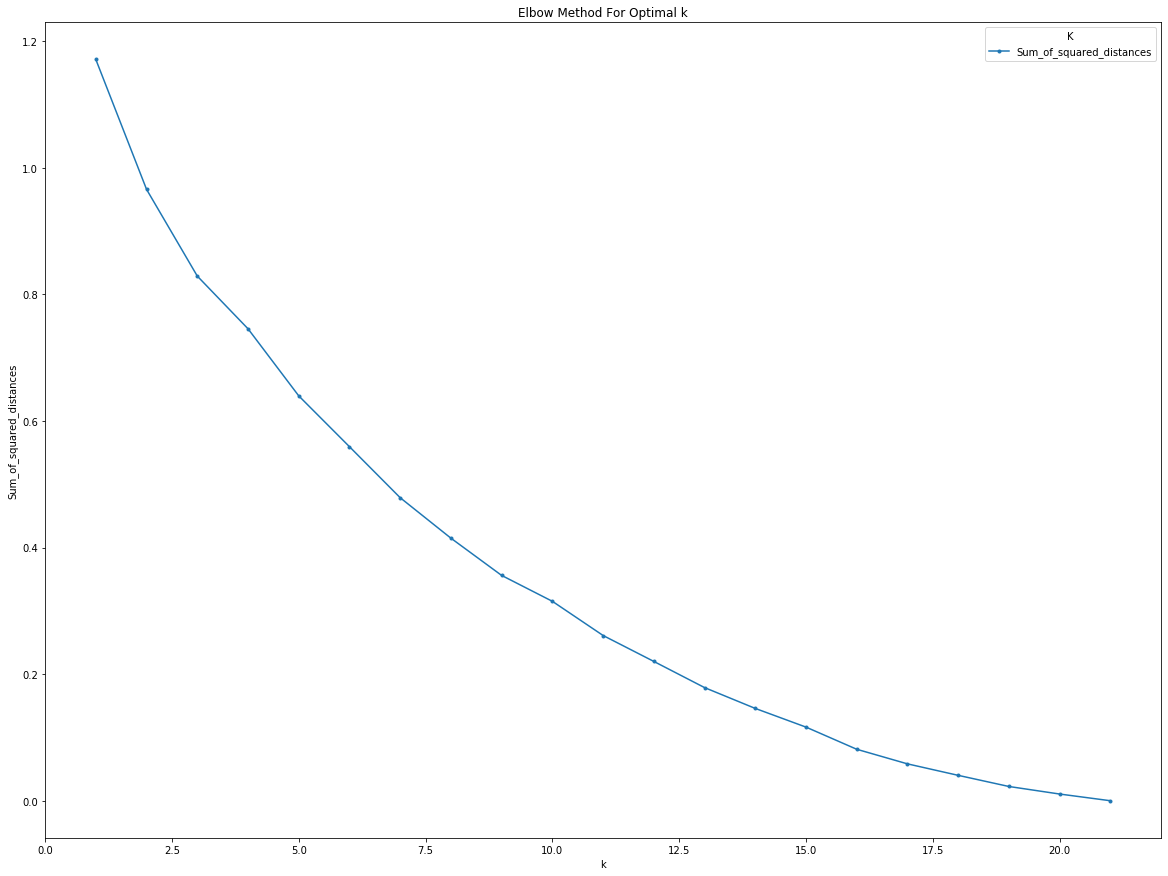

In [37]:
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 3])

In [39]:

df['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(neighborhoods_venues_sorted.shape)

(39, 24)
(21, 24)
(21, 11)


In [40]:
madrid_merged = df

# add clustering labels
madrid_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_merged[['Latitude', 'Longitude']] = coordinates_df[['Latitude', 'Longitude']]
madrid_merged['Latitude'] = madrid_merged['Latitude'].astype(float)
madrid_merged['Longitude'] = madrid_merged['Longitude'].astype(float)
print(madrid_merged.shape)
madrid_merged.head() # check the last columns!

(21, 37)


,Country of Procedence,Total Ciudad de Madrid,Centro,Arganzuela,Retiro,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
0,Rumanía,45036.0,815.0,754.0,480.0,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,1,Restaurant,Spanish Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Falafel Restaurant,Sandwich Place,Breakfast Spot,Burger Joint,40.415347,-3.707371
1,China,37276.0,1508.0,1356.0,564.0,755.0,652.0,1988.0,816.0,1733.0,960.0,2554.0,4398.0,9207.0,3602.0,564.0,1960.0,1104.0,1236.0,685.0,472.0,972.0,190.0,Barajas,1,Hotel,Spanish Restaurant,Restaurant,Coffee Shop,Tapas Restaurant,Wine Bar,Diner,Mexican Restaurant,Fast Food Restaurant,Argentinian Restaurant,40.402733,-3.695403
2,Ecuador,23953.0,647.0,741.0,265.0,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,0,Soccer Field,Bakery,Pizza Place,Plaza,Nightclub,Burger Joint,Fast Food Restaurant,Metro Station,Tapas Restaurant,Park,40.408072,-3.676729
3,Venezuela,23359.0,1563.0,913.0,638.0,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,1,Plaza,Tapas Restaurant,Spanish Restaurant,Hostel,Cocktail Bar,Bistro,Café,Ice Cream Shop,Pastry Shop,Gym / Fitness Center,40.430000,-3.677778
4,Colombia,22618.0,998.0,717.0,483.0,803.0,551.0,822.0,659.0,999.0,454.0,1786.0,3395.0,1752.0,1733.0,482.0,1792.0,910.0,1618.0,740.0,384.0,1282.0,258.0,Chamartin,1,Spanish Restaurant,Restaurant,Grocery Store,Bakery,Tapas Restaurant,Café,Gastropub,Coffee Shop,Pizza Place,Park,40.453333,-3.677500


In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:

madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
2,Ecuador,619.0,380.0,1395.0,453.0,632.0,387.0,2194.0,3674.0,1806.0,3290.0,491.0,2471.0,401.0,2017.0,498.0,439.0,1015.0,138.0,Carabanchel,0,Soccer Field,Bakery,Pizza Place,Plaza,Nightclub,Burger Joint,Fast Food Restaurant,Metro Station,Tapas Restaurant,Park,40.408072,-3.676729
11,Bolivia,342.0,315.0,576.0,280.0,401.0,225.0,1458.0,2625.0,2827.0,1573.0,227.0,1086.0,479.0,737.0,222.0,159.0,454.0,71.0,Moratalaz,0,Soccer Field,Bakery,Pizza Place,Plaza,Nightclub,Café,Brewery,Food Truck,Bar,Park,40.381336,-3.706856


In [43]:

madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
3,Venezuela,1564.0,933.0,1310.0,794.0,1428.0,630.0,1448.0,1870.0,875.0,1829.0,480.0,1858.0,1434.0,909.0,762.0,321.0,1486.0,314.0,Centro,1,Plaza,Tapas Restaurant,Spanish Restaurant,Hostel,Cocktail Bar,Bistro,Café,Ice Cream Shop,Pastry Shop,Gym / Fitness Center,40.430000,-3.677778
0,Rumanía,753.0,680.0,1468.0,597.0,1830.0,991.0,4904.0,5873.0,2241.0,4784.0,1286.0,2888.0,1466.0,3646.0,3384.0,2606.0,2929.0,661.0,Arganzuela,1,Restaurant,Spanish Restaurant,Grocery Store,Bakery,Tapas Restaurant,Gym / Fitness Center,Falafel Restaurant,Sandwich Place,Breakfast Spot,Burger Joint,40.415347,-3.707371
19,Reino Unido,550.0,466.0,329.0,501.0,313.0,304.0,211.0,170.0,81.0,142.0,59.0,285.0,319.0,61.0,49.0,27.0,120.0,74.0,Villa de Vallecas,1,Park,Plaza,Food,Spanish Restaurant,Motorcycle Shop,Metro Station,Soccer Field,Grocery Store,Dessert Shop,Diner,40.426001,-3.612764
13,Portugal,695.0,534.0,590.0,509.0,693.0,365.0,533.0,658.0,283.0,597.0,173.0,612.0,727.0,302.0,262.0,168.0,565.0,191.0,Retiro,1,Spanish Restaurant,Grocery Store,Supermarket,Museum,Tapas Restaurant,Food & Drink Shop,Burger Joint,Italian Restaurant,Dessert Shop,Brewery,40.409869,-3.644436
7,Perú,612.0,419.0,965.0,567.0,805.0,368.0,2026.0,2425.0,1131.0,2079.0,668.0,1726.0,603.0,1280.0,564.0,338.0,810.0,106.0,Fuencarral-El Pardo,1,Clothing Store,Fast Food Restaurant,Burger Joint,Italian Restaurant,Tapas Restaurant,American Restaurant,Coffee Shop,Sandwich Place,Restaurant,Pizza Place,40.478611,-3.709722
8,Paraguay,521.0,657.0,3311.0,584.0,1024.0,636.0,2061.0,2152.0,727.0,1354.0,360.0,1619.0,583.0,870.0,217.0,199.0,581.0,151.0,Hortaleza,1,Breakfast Spot,Pizza Place,Supermarket,Fast Food Restaurant,Sandwich Place,Food,Spanish Restaurant,Restaurant,Donut Shop,Plaza,40.435151,-3.718765
5,Marruecos,322.0,280.0,1393.0,320.0,930.0,342.0,1539.0,2223.0,942.0,3437.0,258.0,1011.0,426.0,3372.0,1655.0,802.0,649.0,333.0,Chamberí,1,Spanish Restaurant,Restaurant,Bar,Japanese Restaurant,Brewery,Café,Tapas Restaurant,Plaza,Italian Restaurant,Gastropub,40.460556,-3.700000
6,Italia,1817.0,1060.0,1194.0,1640.0,1195.0,710.0,826.0,915.0,412.0,704.0,310.0,1258.0,1109.0,330.0,427.0,189.0,786.0,337.0,Ciudad Lineal,1,Spanish Restaurant,Supermarket,Argentinian Restaurant,Gastropub,Restaurant,Burger Joint,Gym / Fitness Center,Cosmetics Shop,Music Venue,Diner,40.432792,-3.697186
10,Honduras,332.0,337.0,755.0,317.0,863.0,335.0,2021.0,2870.0,1115.0,2483.0,281.0,1062.0,349.0,1040.0,387.0,165.0,598.0,62.0,Moncloa-Aravaca,1,Restaurant,Spanish Restaurant,Bar,Tapas Restaurant,Pizza Place,Ice Cream Shop,Italian Restaurant,Mediterranean Restaurant,Pub,Coffee Shop,40.383669,-3.727989
14,Francia,968.0,554.0,387.0,699.0,366.0,347.0,196.0,188.0,66.0,138.0,85.0,599.0,1802.0,68.0,59.0,52.0,357.0,197.0,Salamanca,1,Spanish Restaurant,Restaurant,Seafood Restaurant,Mediterranean Restaurant,Coffee Shop,Tapas Restaurant,Mexican Restaurant,Clothing Store,Burger Joint,Breakfast Spot,40.450000,-3.650000


In [44]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
17,Bulgaria,113.0,123.0,245.0,74.0,316.0,170.0,996.0,988.0,395.0,760.0,285.0,780.0,283.0,516.0,261.0,269.0,662.0,92.0,Usera,2,Seafood Restaurant,Asian Restaurant,Fast Food Restaurant,Spanish Restaurant,Bubble Tea Shop,Mobile Phone Shop,Theater,Chinese Restaurant,Noodle House,Donut Shop,40.3796,-3.62135


In [45]:

madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
15,Ucrania,220.0,176.0,221.0,149.0,312.0,168.0,1745.0,1251.0,428.0,912.0,239.0,348.0,282.0,1649.0,256.0,152.0,390.0,56.0,San Blas-Canillejas,3,Metro Station,Gas Station,Asian Restaurant,Snack Place,Supermarket,Pizza Place,Shopping Mall,Gym,Grocery Store,Dessert Shop,40.469457,-3.640482
9,República Dominicana,344.0,322.0,2272.0,443.0,589.0,536.0,1501.0,1607.0,1202.0,1989.0,223.0,1581.0,359.0,1881.0,296.0,151.0,889.0,103.0,Latina,3,Pizza Place,Metro Station,Park,Train Station,Grocery Store,Fast Food Restaurant,Asian Restaurant,Falafel Restaurant,Bakery,Electronics Store,40.402461,-3.741294


In [46]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(5, madrid_merged.shape[1]))]].sort_values(by = ['Country of Procedence'], ascending = False)

,Country of Procedence,Salamanca,Chamartin,Tetuán,Chamberí,Fuencarral-El Pardo,Moncloa-Aravaca,Latina,Carabanchel,Usera,Puente de Vallecas,Moratalaz,Ciudad Lineal,Hortaleza,Villaverde,Villa de Vallecas,Vicálvaro,San Blas-Canillejas,Barajas,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
20,Bangladesh,32.0,21.0,210.0,48.0,27.0,14.0,257.0,410.0,175.0,649.0,23.0,179.0,27.0,489.0,57.0,32.0,78.0,2.0,Villaverde,4,Spanish Restaurant,Pizza Place,Grocery Store,Diner,Burger Joint,Women's Store,Electronics Store,Fish Market,Fast Food Restaurant,Farmers Market,40.470196,-3.58489


<H1>Conclusions: </H1>
As far as we are able to see with this data, there are no mexican populations registered in Madrid. However, in Cluster 1, it is possible to notice that there's a mexican restaurant located in the "Centro" neighborhood, which is the town center.

If a deeper exam is performed into this cluster, it is noticeable that its the living population are mostly latinos, mixed with some other europeans, but mainly, the people living in this cluster come from south american countries. Apart of this fact, other kinds of latin restaurants can be found, like argetinian restaurants, tapas restaurants, and italian restaurants. So it is possible to tell that the inhabitants of this area likes these kinds of food.

By following this logic, if we would like to open a new mexican restaurant in the city or any kind of restaurant in fact, it would only be necessary to find a where are the restaurants similar the the one we want to open, study the population in that area, and find similar clusters of population in the city that don't have yet or have very few resturants like the one we would like to open.

In this example, clusters 4 and 5 could make a good match for our target population. Looking at the venues in these clusters, it is possible to find one mexican restaurant, and a good bunch of fast food, argentinian, and south american restaurants. So, in these clusters, it is possible to state that the existing restaurants matches the population's nationalities and tastes.

In conlussion, and taking into consideration the explanations given above as well as the data, it is highly possible that clusters 4 and five could be a good place to open our mexican restaurants. As explained above, the same logic could apply to oopen other kind of restaurant or business in any other area of the city. It is only necessary to to examine the the existing businesses in our target area, and study the population, then compare these 2 factors with the same ones in areas where there are existing business like the one we want to open, and then verify if the matching is correct.